In [29]:
import json
import numpy as np
import random
import requests
import pandas as pd
from configg import gkey
from configo import okey
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [30]:
#Requirement I: Using Citypy library, create list of 500 cities you can visualize weather patterns for. 

#Task A: Create list of 500+ of geographic coordinates to cross-reference against CitiPy Library for city list

#Sub-Task #1: Create latitude/longitude ranges
lat_range = (-90,90)
lon_range = (-180,180)

#Sub-Task #2: Create list of random lat/lon pairings
lats_lons = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lats_lons = zip(lats, lons)

#Sub-Task #3: Store list of unique city names from Citypy  
for lat_lon in lats_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    if city not in cities:
        cities.append(city)

city_names = cities

#Sub-Task 4: Export list of cities as csv
city_df = pd.DataFrame(city_names)
city_df.to_csv("cities.csv", index=False, header=True)


In [31]:
#Task B: Given city list, obtain directed weather information from OpenWeather API

#Sub-Task #1: Construct Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={okey}&q="

#Sub-Task #2: Request weather data for all lat-lon pairings
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
cname = []

for city in city_names:
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        cname.append(city)
    except KeyError:
        print("Point of Error")

Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error
Point of Error


In [32]:
#Task C: Given weather data for city list, create dataframe of all requested weather data

#Convert Temperature from Kelvin to Farenheit
tempF = []
for x in temp:
    tempF.append(1.8*x-469)

#Convert Wind Speed from m/s to mph
winde = []
for x in wind:
    winde.append(2.24*x)

#Create requested dataframe
weather_df = {"city": cname,
              "Lat (deg)": lat,
              "Lon (deg)": lon,
              "Temp (F)": tempF, 
              "Humidity %": hum, 
              "Cloudiness %": cloud, 
              "Wind Speed (mph)": winde}

weather_data = pd.DataFrame(weather_df)
weather_data.to_csv("weather_data.csv", index=False, header=True)
weather_data


,city,Lat (deg),Lon (deg),Temp (F),Humidity %,Cloudiness %,Wind Speed (mph)
0,labuhan,-6.88,112.21,65.942,86,49,8.7808
1,albany,42.60,-73.97,68.678,69,78,2.3968
2,sao miguel do araguaia,-13.28,-50.16,66.824,37,0,4.3008
3,hervey bay,-25.30,152.85,49.670,96,100,9.0048
4,lyngseidet,69.58,20.22,38.870,93,75,31.1360
...,...,...,...,...,...,...,...
564,pangkalanbuun,-2.68,111.62,64.718,98,98,2.6656
565,terrace,54.52,-128.60,55.070,63,75,9.1840
566,port-gentil,-0.72,8.78,65.870,88,20,12.3648
567,sheksna,59.21,38.51,42.380,95,49,5.6224


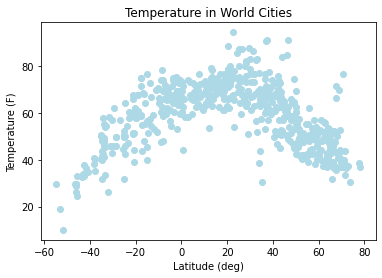

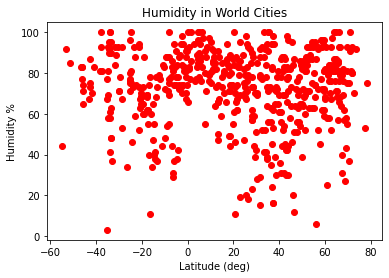

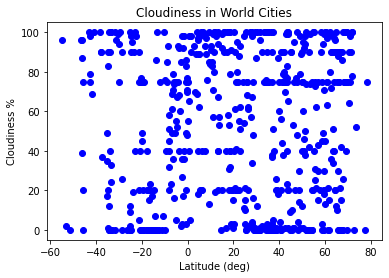

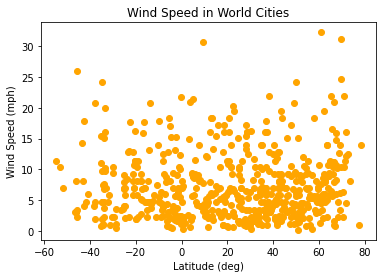

In [38]:
#Task D: Given weather dataframe, construct requested plots with explanations of trends

#Sub-Task #1: Temperature vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Temp (F)"], color="lightblue")
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (deg)")
plt.show()

#Temperature vs. Latitude Observations:
#From a trend of temperature vs. latitude, one can see that the further away a city is from 0 latitude (equator)
#the lower the avg temperature is. This explains the chevron sign in the chart: low at the poles, high at equator. 

#Sub-Task #2: Humidity vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Humidity %"], color="red")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (deg)")
plt.show()

#Humidity vs. Latitude Observations:
#In general, humidities are between 60-90%, and extremely low humidity cases only tend to occur close to the poles,
#(0-20%) humidity.

#Sub-Task #3: Cloudiness vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (deg)")
plt.show()

#Cloudiness vs. Latitude Observations:
#No clear trend here. Some cities close to the equator are cloudy; some are not. 
#Likewise for cities close to the poles. 

#Sub-Task #4: Wind Speed vs. Latitude
plt.scatter(weather_data["Lat (deg)"],weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.show()

#Wind Speed vs. Latitude Observations:
#In general, wind speed are < 8mph, and higher wind speed cases only tend to occur close to the poles,
#but not by much (8-12 mph on average).

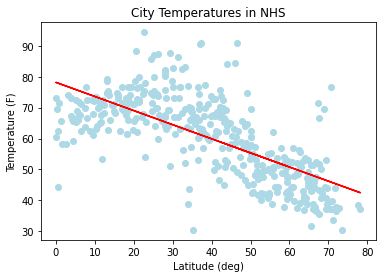

The r-squared is: 0.480548266194714
y =-0.46x + 78.19


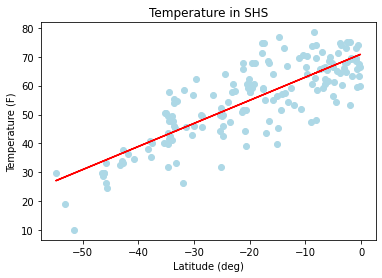

The r-squared is: 0.6689335029525584
y =0.8x + 70.92


In [39]:
#Task E: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Temperature vs. Latitude 

#Nothern Hemisphere (NHS)
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq(6,10),fontsize=15,color="red")

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Temp (F)"], color="lightblue")
plt.title("City Temperatures in NHS")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#NHS Observations
#As cities move away from Latitude 0 (Equator), average temperature decreases from pleasant (~70F) to freezing (~30F).
#This decrease is weakly to moderately linear. 

#Southern Hemisphere (SHS)
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Temp (F)"], color="lightblue")
plt.title("Temperature in SHS")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude (deg)")
plt.show() 
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS Observations
#As cities move from poles to equator, average temperature increases from freezing to ~70F.
#This increase is weakly to moderately linear. 

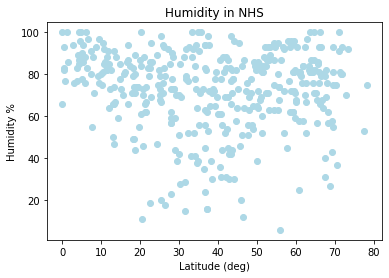

The r-squared is: 0.006066443406075625
y =-0.07x + 75.38


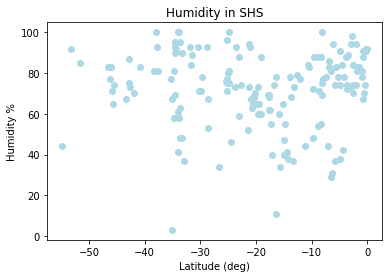

The r-squared is: 0.0007577306314030542
y =-0.04x + 71.36


In [40]:
#Task F: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Humidity vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Humidity %"], color="lightblue")
plt.title("Humidity in NHS")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Humidity %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Humidity %"], color="lightblue")
plt.title("Humidity in SHS")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Chart Comments
#No particular trends here (linear regression done as formality). Only observation is more extreme low humidities
#(<50%) tend to occur away from the equator. 

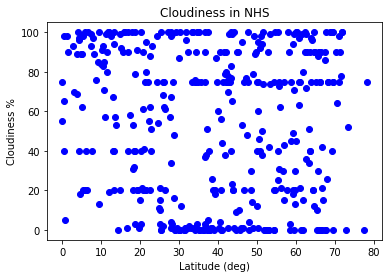

The r-squared is: 0.006611386709608365
y =-0.15x + 58.99


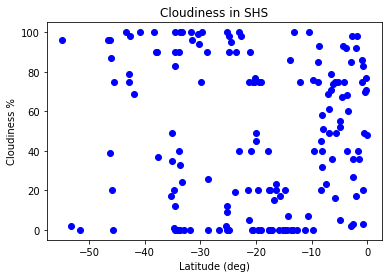

The r-squared is: 0.0013399960503859807
y =-0.1x + 45.29


In [42]:
#Task G: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Cloudiness vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in NHS")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Cloudiness %']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Cloudiness %"], color="blue")
plt.title("Cloudiness in SHS")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Chart Trends
#No discernable trends here...cloudiness and latitude do not seem related at all (confirmed w linear regression).

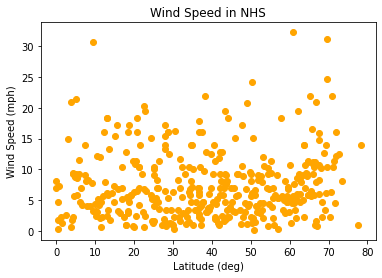

The r-squared is: 0.006085369106703418
y =0.02x + 6.57


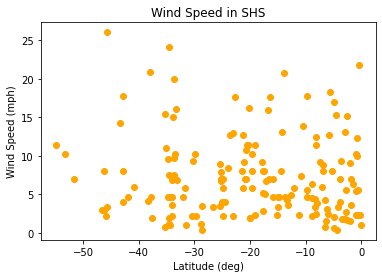

The r-squared is: 0.006633279333393119
y =-0.03x + 6.66


In [41]:
#Task H: Split the weather dataset by NHS/SHS Cities, then chart and do linear regression on Wind Speed vs. Latitude

#NHS
nhs_weather_data = weather_data.loc[weather_data["Lat (deg)"] > 0]

x_values = nhs_weather_data['Lat (deg)']
y_values = nhs_weather_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhs_weather_data["Lat (deg)"],nhs_weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in NHS")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#SHS
shs_weather_data = weather_data.loc[weather_data["Lat (deg)"] < 0]

x_values = shs_weather_data['Lat (deg)']
y_values = shs_weather_data['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shs_weather_data["Lat (deg)"],shs_weather_data["Wind Speed (mph)"], color="orange")
plt.title("Wind Speed in SHS")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (deg)")
plt.show()
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

#Chart Trends
#No discernable trends here either; only observation is that vast majoirty of wind speeds are <20 mph. 
#Some higher wind speeds occur, but do not seem related to latitude. 